In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

'''
随机森林的参数：
n_estimators: 随机森林中树木的数量，这个参数对模型的影响是单调的，值越大，模型效果越好，在训练难度和模型效果之间平衡
'''

wine=load_wine()

wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)


In [23]:
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)

clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)

score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)


print("single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r))


single Tree:0.9259259259259259 Random Forest:0.9814814814814815


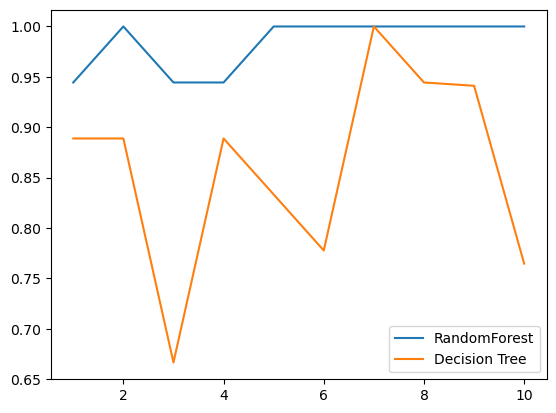

In [25]:
'''
随机森林和决策树在交叉验证下效果对比
交叉验证：数据集划分为n份，依次取每一份作为测试集，每n-1份作为训练集，多次训练模型以观察模型稳定性
'''
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="Decision Tree")
plt.legend()
plt.show()

In [26]:
'''
调参案例
'''

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=load_breast_cancer()





In [34]:
print(data.data.shape) # (596,30) 596个数据，30个特征
print(data.data[0].__len__())
print(len(data.target))

(569, 30)
30
569


In [35]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


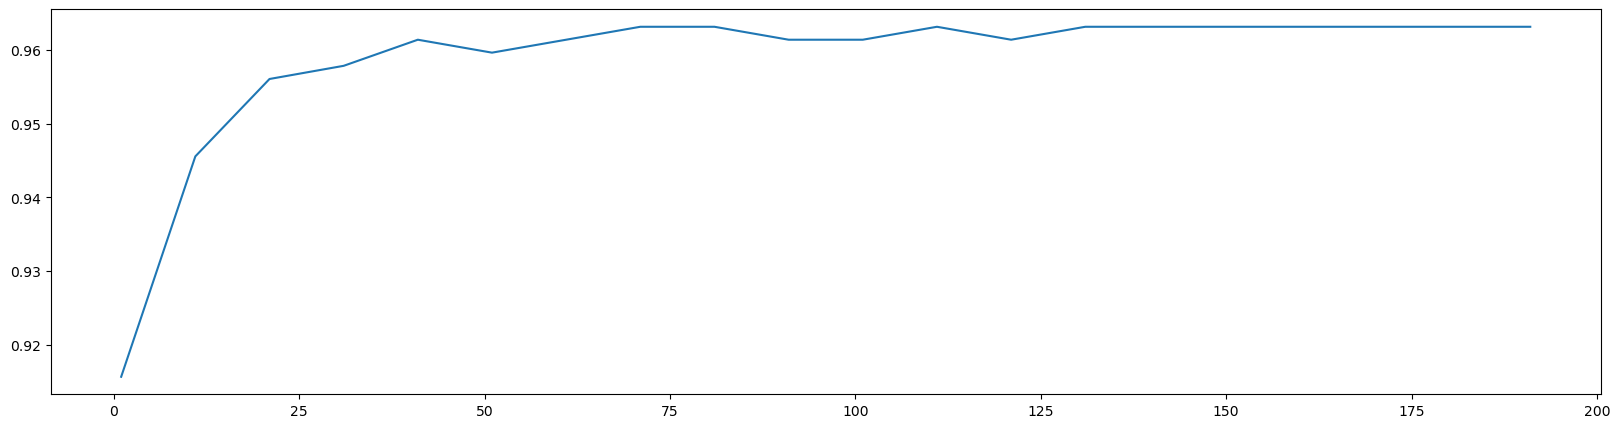

In [39]:
'''
理论基础： 复杂度-泛化误差曲线
用学习曲线来调参。
第一次的学习曲线，可以先用来帮助我们划定范围，取每十个数作为一个阶段，来观察n_estimators的变化如何引起模型的变化
想要看到随着estimator的值得变化，看到趋势，看到什么时候准确率变得平稳。找到复杂度和准确度的平衡点。从而确定一个范围
'''

scorel = []
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,
                               random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()



0.9666353383458647 72


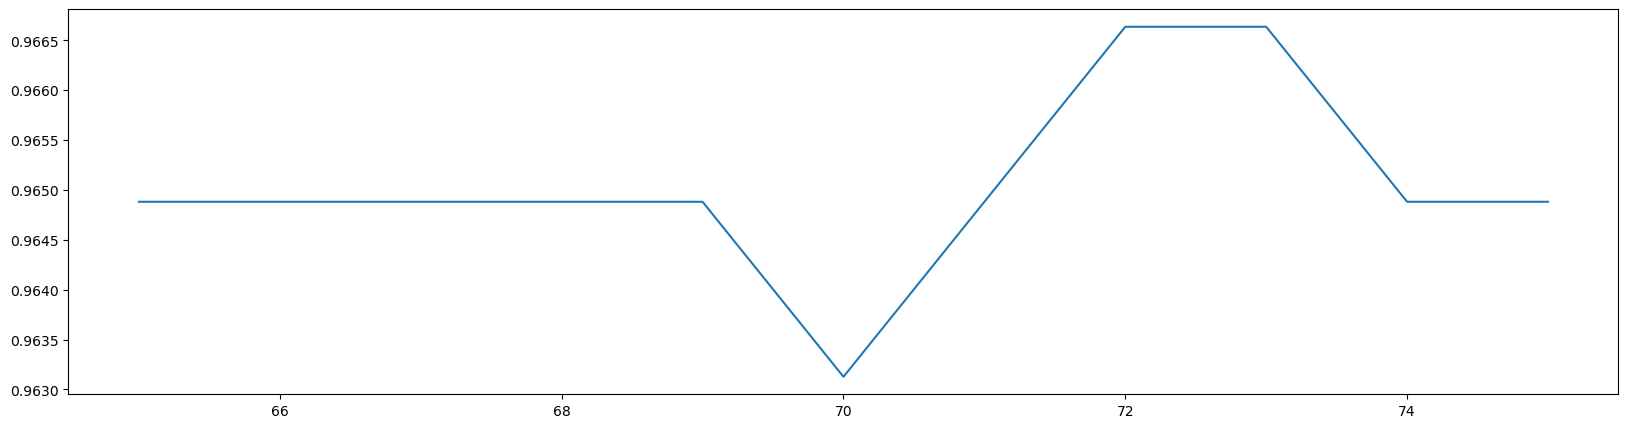

In [43]:
'''
上面得出，峰值在71左右，接下来，在这个范围内进行进一步训练
'''
scorel = []
for i in range(65,76):
    rfc=RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,
                               random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),[*range(65,76)][(scorel.index(max(scorel)))])
plt.figure(figsize=[20,5])
plt.plot(range(65,76),scorel)
plt.show()

In [45]:
'''
网格搜索法
有一些参数没有参照，得不出一个范围，这种情况我们先使用学习曲线，看趋势，从曲线中跑出一个结果，
从结果中选取一个更小的区间，再跑曲线。为网格搜索做准备

有些参数是有范围的，直接就可以跑网格
'''

# 网格搜索调参：max_depth
#这里数据比较小，一般大的要50-100
param_grid={'max_depth':np.arange(1,20,1)}

rfc=RandomForestClassifier(n_estimators=72,
                           random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

print(GS.best_params_)
print(GS.best_score_)




{'max_depth': 8}
0.9683897243107771


In [47]:
'''
模型的导出
模型的导入
'''
import joblib
joblib.dump(rfc, "rfc.joblib")  # save

['rfc.joblib']

In [48]:
loaded_rf = joblib.load("rfc.joblib")  # load

In [ ]:
#模型的预测
#rfc.fit()
